# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
  
    
# Print the city count to confirm sufficient count
city_len = len(cities)
city_len

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#base url
weather_url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'

#making lists for future dataframe
#made a new cities list in order to not count the ones that have no data
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
lat = []
lng = []
new_cities = []

#setting indexes to print
set_count = 1
record_count = 0

print(f"Beginning Data Retrieval")
print(f"---------------------------------------------------")
for city in cities:
    try:
        weather_query = weather_url + "appid=" + weather_api_key +"&units="+ units + "&q=" + city
        weather_response = requests.get(weather_query).json()
        max_temp.append(weather_response['main']['temp_max'])
        humidity.append(weather_response['main']['humidity'])
        cloudiness.append(weather_response['clouds']['all'])
        wind_speed.append(weather_response['wind']['speed'])
        country.append(weather_response['sys']['country'])
        date.append(weather_response['dt'])
        lat.append(weather_response['coord']['lat'])
        lng.append(weather_response['coord']['lon'])
        new_cities.append(weather_response['name'])
        
        if record_count > 49:
            record_count = 0
            set_count += 1
        else:
            record_count += 1
            
        print(f"Processing Record {record_count} of Set {set_count} | {city}")
        
    except:
        print(f"City not found. Skipping...")
print(f"----------------------------------------------------")
print(f"Data Retrieval Complete")
print(f"----------------------------------------------------")

Beginning Data Retrieval
---------------------------------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | butaritari
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | severo-kurilsk
Processing Record 5 of Set 1 | bengkulu
Processing Record 6 of Set 1 | saskylakh
Processing Record 7 of Set 1 | kismayo
Processing Record 8 of Set 1 | san jose
Processing Record 9 of Set 1 | hami
Processing Record 10 of Set 1 | dawlatabad
Processing Record 11 of Set 1 | dubna
Processing Record 12 of Set 1 | georgetown
Processing Record 13 of Set 1 | vao
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | norman wells
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | kita
Processing Record 18 of Set 1 | iqaluit
Processing Record 19 of Set 1 | victoria
Processing Record 20 of Set 1 | luoyang
Processing Record 21 of Set 1 | ostrovnoy
City not found. Skipping...
Processing Record 22 of Set 1 | frutal
Proces

Processing Record 32 of Set 4 | kalmunai
Processing Record 33 of Set 4 | doka
Processing Record 34 of Set 4 | venado tuerto
Processing Record 35 of Set 4 | hit
Processing Record 36 of Set 4 | osa
Processing Record 37 of Set 4 | faya
Processing Record 38 of Set 4 | mantua
Processing Record 39 of Set 4 | cidreira
Processing Record 40 of Set 4 | warburg
Processing Record 41 of Set 4 | yar-sale
Processing Record 42 of Set 4 | hearst
Processing Record 43 of Set 4 | yamada
Processing Record 44 of Set 4 | bekhtery
Processing Record 45 of Set 4 | japura
Processing Record 46 of Set 4 | razole
Processing Record 47 of Set 4 | sao filipe
Processing Record 48 of Set 4 | lindsay
Processing Record 49 of Set 4 | dunedin
Processing Record 50 of Set 4 | torbay
Processing Record 0 of Set 5 | noumea
Processing Record 1 of Set 5 | tumut
Processing Record 2 of Set 5 | samana
Processing Record 3 of Set 5 | korla
Processing Record 4 of Set 5 | rio grande
City not found. Skipping...
Processing Record 5 of Set 

Processing Record 17 of Set 8 | chicama
Processing Record 18 of Set 8 | tabou
Processing Record 19 of Set 8 | kasongo-lunda
Processing Record 20 of Set 8 | hasaki
Processing Record 21 of Set 8 | covasint
City not found. Skipping...
Processing Record 22 of Set 8 | kilindoni
Processing Record 23 of Set 8 | pingxiang
Processing Record 24 of Set 8 | coquimbo
Processing Record 25 of Set 8 | kristiinankaupunki
Processing Record 26 of Set 8 | labuhan
Processing Record 27 of Set 8 | pombas
Processing Record 28 of Set 8 | raudeberg
Processing Record 29 of Set 8 | shymkent
Processing Record 30 of Set 8 | sciacca
Processing Record 31 of Set 8 | laguna
Processing Record 32 of Set 8 | flin flon
Processing Record 33 of Set 8 | salalah
Processing Record 34 of Set 8 | araouane
Processing Record 35 of Set 8 | souillac
Processing Record 36 of Set 8 | port pirie
Processing Record 37 of Set 8 | bahar
Processing Record 38 of Set 8 | te anau
Processing Record 39 of Set 8 | luderitz
Processing Record 40 of S

Processing Record 0 of Set 12 | novi pazar
Processing Record 1 of Set 12 | magdagachi
Processing Record 2 of Set 12 | atikokan
Processing Record 3 of Set 12 | mezhova
Processing Record 4 of Set 12 | saint-joseph
Processing Record 5 of Set 12 | ban nahin
Processing Record 6 of Set 12 | valparaiso
Processing Record 7 of Set 12 | karratha
----------------------------------------------------
Data Retrieval Complete
----------------------------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#setting dataframe
weather_df = pd.DataFrame({'City':new_cities, 'Lat':lat, 'Lng':lng, 'Max Temp':max_temp, 
                           'Humidity':humidity, 'Cloudiness':cloudiness, 'Wind Speed':wind_speed, 
                           'Country':country, 'Date':date})
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.5906,26.8910,53.44,47,1,10.29,ZA,1627177551
1,Butaritari,3.0707,172.7902,83.95,72,13,12.24,KI,1627177535
2,Hilo,19.7297,-155.0900,80.33,85,90,8.05,US,1627177580
3,Severo-Kuril'sk,50.6789,156.1250,57.61,89,98,2.15,RU,1627177581
4,Bengkulu,-3.8004,102.2655,81.73,67,1,1.21,ID,1627177581


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
#  Get the indices of cities that have humidity over 100%.
outliers = weather_df.loc[weather_df['Humidity']> 100]
len(outliers['City'])

0

In [6]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "df".
df = weather_df.loc[weather_df['Humidity']<= 100]
df.head(5)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.5906,26.8910,53.44,47,1,10.29,ZA,1627177551
1,Butaritari,3.0707,172.7902,83.95,72,13,12.24,KI,1627177535
2,Hilo,19.7297,-155.0900,80.33,85,90,8.05,US,1627177580
3,Severo-Kuril'sk,50.6789,156.1250,57.61,89,98,2.15,RU,1627177581
4,Bengkulu,-3.8004,102.2655,81.73,67,1,1.21,ID,1627177581


In [7]:
#placing data retrieved into csv file
df.to_csv('output_data/cities.csv', index = False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

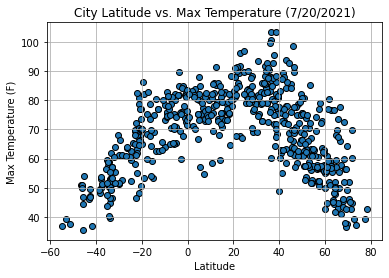

In [8]:
plt.scatter(df['Lat'], df['Max Temp'], edgecolor = 'black')
plt.title('City Latitude vs. Max Temperature (7/20/2021)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig("Images/latvstempplot.png")

## Latitude vs. Humidity Plot

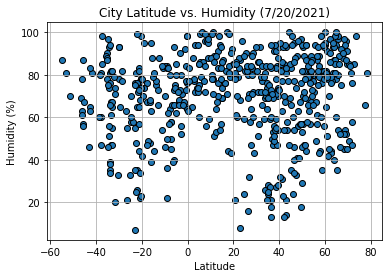

In [9]:
plt.scatter(df['Lat'], df['Humidity'], edgecolor = 'black')
plt.title('City Latitude vs. Humidity (7/20/2021)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig('Images/latvshumidityplot.png')

## Latitude vs. Cloudiness Plot

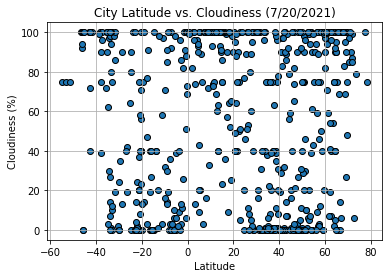

In [10]:
plt.scatter(df['Lat'], df['Cloudiness'], edgecolor = 'black')
plt.title('City Latitude vs. Cloudiness (7/20/2021)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig('Images/latvscloudinessplot.png')

## Latitude vs. Wind Speed Plot

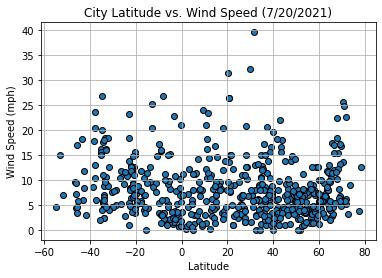

In [11]:
plt.scatter(df['Lat'], df['Wind Speed'], edgecolor = 'black')
plt.title('City Latitude vs. Wind Speed (7/20/2021)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig('Images/latvswindspeedplot.png')

## Linear Regression

In [12]:
#need to split main dataframe to categorize between north and south hemisphere
north = df.loc[df['Lat'] >= 0]
south = df.loc[df['Lat'] < 0]
#north.head()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.3942512011712044


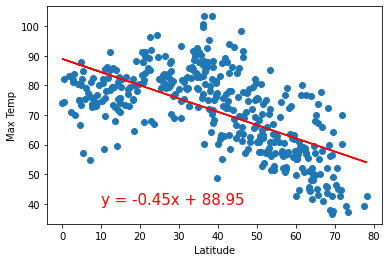

<Figure size 432x288 with 0 Axes>

In [13]:
x_values = north['Lat']
y_values = north['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig('Images/northmaxtemplatlinregress.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6730553931253418


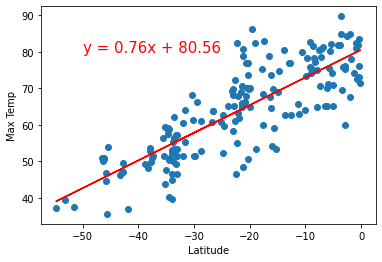

<Figure size 432x288 with 0 Axes>

In [14]:
x_values = south['Lat']
y_values = south['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig('Images/southmaxtemplatlinregress.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.002355018510764389


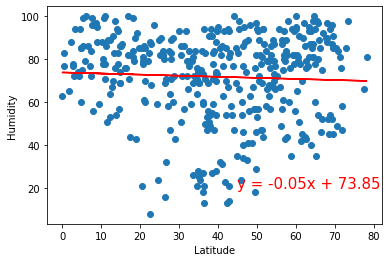

<Figure size 432x288 with 0 Axes>

In [15]:
x_values = north['Lat']
y_values = north['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig('Images/northhumidlatlinregress.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.00019509701555690953


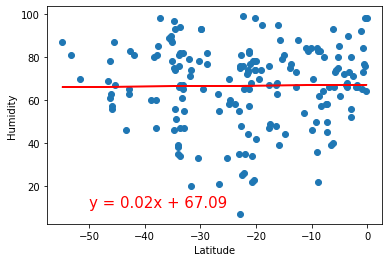

<Figure size 432x288 with 0 Axes>

In [16]:
x_values = south['Lat']
y_values = south['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig('Images/southhumidlatlinregress.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.005352730248155276


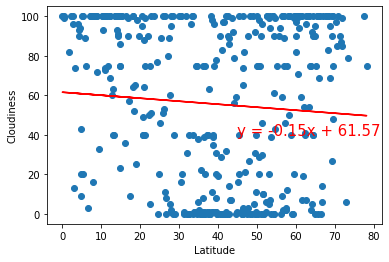

<Figure size 432x288 with 0 Axes>

In [17]:
x_values = north['Lat']
y_values = north['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig('Images/northcloudlatlinregress.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.07857366561012713


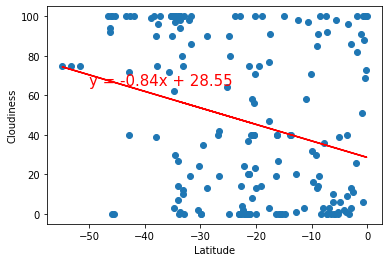

<Figure size 432x288 with 0 Axes>

In [18]:
x_values = south['Lat']
y_values = south['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,65),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig('Images/southcloudlatlinregress.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 7.630951476317583e-06


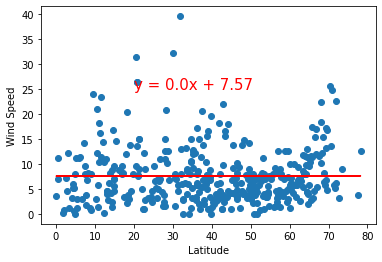

<Figure size 432x288 with 0 Axes>

In [19]:
x_values = north['Lat']
y_values = north['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig('Images/northwindlatlinregress.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03992333975740646


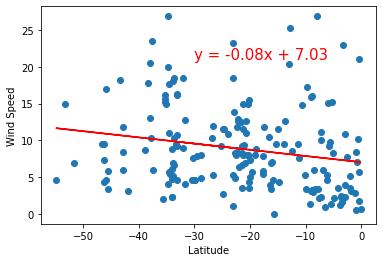

<Figure size 432x288 with 0 Axes>

In [20]:
x_values = south['Lat']
y_values = south['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,21),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig('Images/southwindlatlinregress.png')